In [21]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cmcrameri.cm as cmc

In [3]:
csv_path = '/home/yl241/experiments/fCLIPSeg/inter-annotator/csv/all_metrics.csv'
df = pd.read_csv(csv_path)
print(df.columns.tolist())
df.head()

['annotator', 'img_id', 'dice', 'dice_debris', 'f1_debris_only', 'f1_score', 'iou', 'precision_debris_high', 'precision_debris_low', 'precision_no_debris', 'recall_debris_high', 'recall_debris_low', 'recall_no_debris']


,annotator,img_id,dice,dice_debris,f1_debris_only,f1_score,iou,precision_debris_high,precision_debris_low,precision_no_debris,recall_debris_high,recall_debris_low,recall_no_debris
0,annotator_1,126,0.881869,0.966836,0.838945,0.881869,0.816728,1.000000,0.553020,0.990123,1.000000,0.875595,0.946301
1,annotator_1,135,0.842677,0.928016,0.787218,0.842677,0.746068,0.829309,0.576496,0.980592,0.983523,0.812880,0.928044
2,annotator_1,139,0.921270,0.994379,0.893680,0.921270,0.867759,1.000000,0.659024,0.997973,1.000000,0.977765,0.955835
3,annotator_1,146,0.822370,0.929195,0.772476,0.822370,0.714170,0.796648,0.537031,0.997574,0.999183,0.850839,0.857341
4,annotator_1,147,0.568326,0.443500,0.368176,0.568326,0.507294,0.000000,0.684321,0.999297,1.000000,0.796947,0.939782


In [4]:
group_a_annotators = ["annotator_1", "annotator_2", "annotator_3"]
group_b_annotators = ["annotator_4", "annotator_5", "annotator_6"]
group_a = df[df["annotator"].isin(group_a_annotators)]
group_b = df[df["annotator"].isin(group_b_annotators)]

In [5]:
mean_values = df.drop(columns=['annotator', 'img_id']).mean()
print(mean_values)

dice                     0.811582
dice_debris              0.851485
f1_debris_only           0.731613
f1_score                 0.812891
iou                      0.739586
precision_debris_high    0.834281
precision_debris_low     0.598108
precision_no_debris      0.988847
recall_debris_high       0.921883
recall_debris_low        0.787770
recall_no_debris         0.963582
dtype: float64


In [6]:
# sort by lowest dice score and take 10 worst
worst_10 = df.nsmallest(10, 'dice')

# get the list of img_ids
worst_10_img_ids = worst_10['img_id'].tolist()

print(worst_10_img_ids)

[20773, 435, 20720, 20774, 8555, 6768, 20976, 6995, 16425, 18758]


In [7]:
# compute average metrics per annotator
annotator_means = df.groupby('annotator').mean(numeric_only=True)
# display the result
annotator_means


,img_id,dice,dice_debris,f1_debris_only,f1_score,iou,precision_debris_high,precision_debris_low,precision_no_debris,recall_debris_high,recall_debris_low,recall_no_debris
annotator,,,,,,,,,,,,
annotator_1,8874.436000,0.777369,0.847967,0.688867,0.778702,0.698735,0.835945,0.498212,0.990637,0.914799,0.807733,0.931061
annotator_2,8550.492424,0.790703,0.834168,0.701502,0.791966,0.713347,0.763442,0.577175,0.985052,0.945572,0.747207,0.961541
annotator_3,8550.492424,0.828469,0.831895,0.756067,0.829731,0.757555,0.875285,0.686725,0.982405,0.891004,0.733670,0.973278
annotator_4,13097.848000,0.865019,0.899870,0.804438,0.865019,0.802326,0.909150,0.668579,0.992568,0.933845,0.844847,0.980126
annotator_5,13097.848000,0.811434,0.866623,0.731285,0.814100,0.739890,0.776319,0.586967,0.994576,0.962809,0.814514,0.965815
annotator_6,13097.848000,0.796723,0.830451,0.707835,0.798056,0.726128,0.847217,0.567200,0.988419,0.883673,0.783949,0.969240


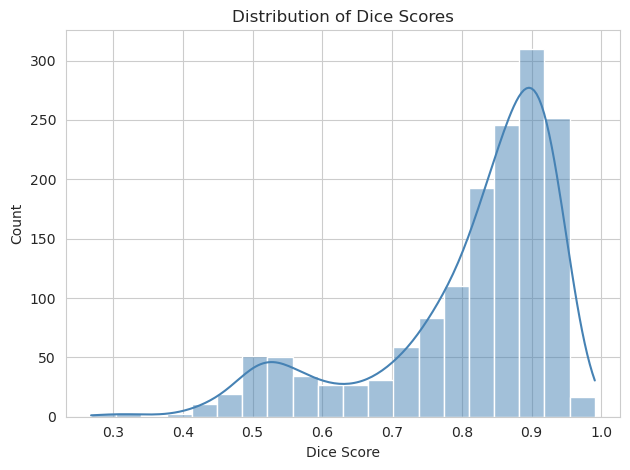

In [8]:
plt.figure()
sns.histplot(data=df, x="dice", bins=20, kde=True, color="steelblue")
plt.title("Distribution of Dice Scores")
plt.xlabel("Dice Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [22]:
# 2. Determine the number of annotators
n_annotators = df["annotator"].nunique()

# 3. Sample N colors from 'batlow' using linspace
discrete_vals = np.linspace(0, 1, n_annotators)                  # Sequence in [0,1] for sampling  [oai_citation:20‡stackoverflow.com](https://stackoverflow.com/questions/8931268/using-colormaps-to-set-color-of-line-in-matplotlib?utm_source=chatgpt.com) [oai_citation:21‡pyhogs.github.io](https://pyhogs.github.io/colormap-examples.html?utm_source=chatgpt.com)
rgba_array = cmc.batlow(discrete_vals)                            # Returns an (N×4) array of RGBA values  [oai_citation:22‡pyhogs.github.io](https://pyhogs.github.io/colormap-examples.html?utm_source=chatgpt.com) [oai_citation:23‡cogeotiff.github.io](https://cogeotiff.github.io/rio-tiler/colormap/?utm_source=chatgpt.com)

# 4a. Convert RGBA to RGB tuples (drop alpha) for Seaborn
palette_list = [tuple(rgba_array[i][:3]) for i in range(n_annotators)]

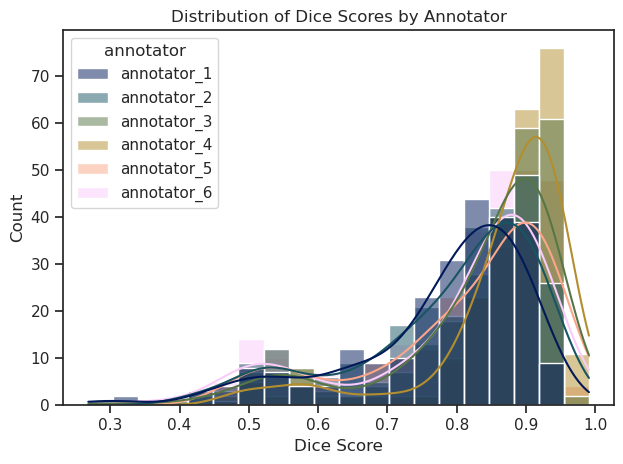

In [25]:
plt.figure()
sns.histplot(
    data=df,
    x="dice",
    hue="annotator",
    bins=20,
    kde=True,
    palette=palette_list,
)
plt.title("Distribution of Dice Scores by Annotator")
plt.xlabel("Dice Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

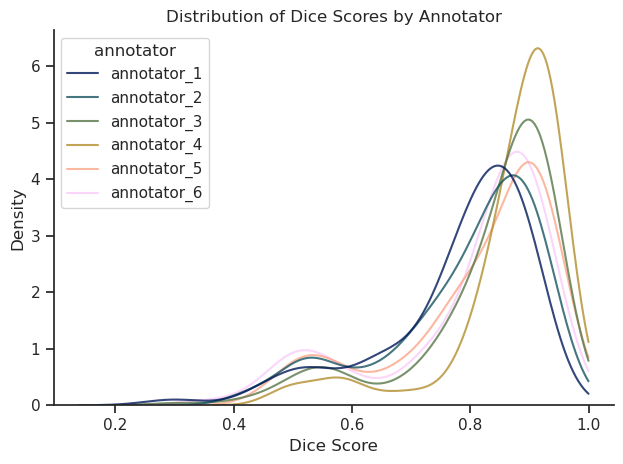

In [32]:
plt.figure()
sns.kdeplot(
    data=df,
    x="dice",
    hue="annotator",
    fill=False,             # Fill under each density curve
    common_norm=False,     # Normalize each annotator’s KDE independently
    palette=palette_list,  # Use the same discrete list of colors
    alpha=0.8,             # Optional transparency for overlap clarity
    linewidth=1.5,          # Thicker outline for each KDE
    clip=(0, 1)
)
sns.despine()  # Optional: remove top and right spines for cleaner look
plt.title("Distribution of Dice Scores by Annotator")
plt.xlabel("Dice Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

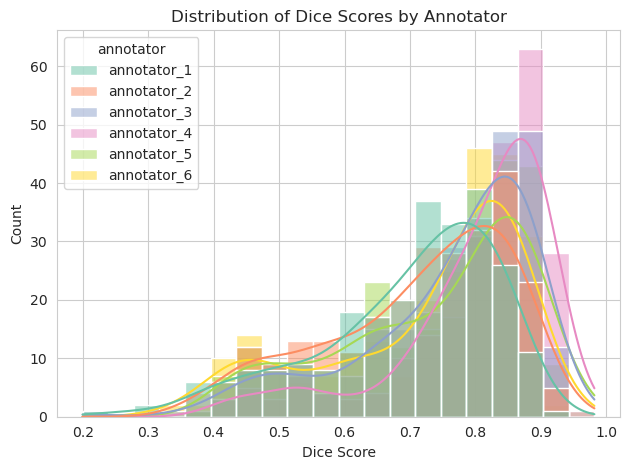

In [10]:
plt.figure()
sns.histplot(
    data=df,
    x="iou",
    hue="annotator",
    bins=20,
    kde=True,
    palette="Set2"
)
plt.title("Distribution of Dice Scores by Annotator")
plt.xlabel("Dice Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

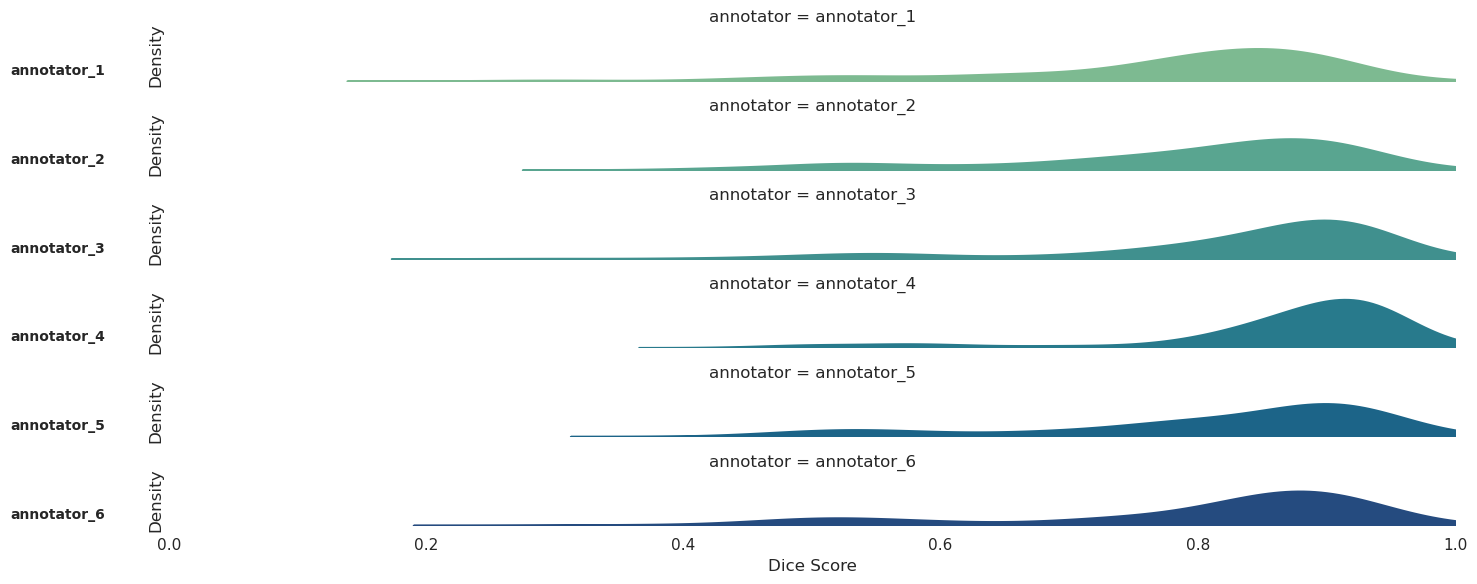

In [11]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# 4. Initialize FacetGrid: one row per annotator
g = sns.FacetGrid(df , row="annotator", hue="annotator",
                  aspect=15, height=1.0, palette="crest")

# 5. Map a filled KDE of the 'dice' metric onto each row
g.map_dataframe(sns.kdeplot, x="dice", fill=True, alpha=1, linewidth=1.5)

# 6. Adjust aesthetics
g.set(xlim=(0, 1))            # If 'dice' is on [0,1]; adjust as needed
g.set(yticks=[])             # Hide y-axis ticks
g.despine(bottom=True, left=True)
g.fig.subplots_adjust(hspace=-0.5)  # Bring plots closer together

# 7. Annotate each row with the annotator label
for ax, annotator in zip(g.axes.flatten(), df ['annotator'].unique()):
    ax.text(-0.05, 0.2, annotator, fontweight="bold",
            fontsize=10, ha="right", va="center", transform=ax.transAxes)

# 8. Finalize and show
plt.xlabel("Dice Score")
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


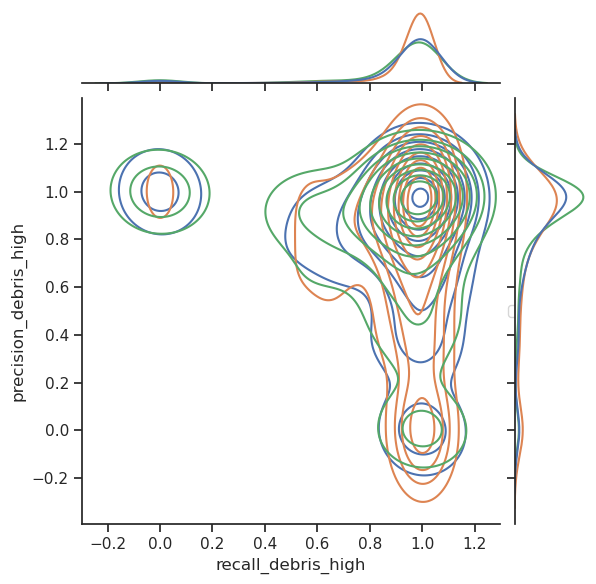

In [12]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=group_a,
    x="recall_debris_high", y="precision_debris_high", hue="annotator",
    kind="kde",
)
plt.legend()
g.ax_joint.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()